In [1]:
# read block assignment file
filename = 'min_county_splits_TN_SS_(by_Maral_Shahmizad_and_Austin_Buchanan_of_Oklahoma_State_University).baf'

import pandas
baf = pandas.read_csv( filename, header=None )

In [2]:
# store block assignments as dictionary
labeling = dict()
for index,row in baf.iterrows():
    geoid = row[0]
    geoidstr = str(geoid)
    if len(geoidstr) < 15: # fix errors with leading zero
        geoidstr = '0' + geoidstr
    labeling[geoidstr] = row[1]

In [3]:
# get geopandas dataframe
filepath = 'C:\\districting-data-2020\\'
filename = 'TN_block.shp'

import geopandas as gpd
df = gpd.read_file( filepath + filename )

In [4]:
# add block assignments to column of dataframe
n = len(labeling)
assignment = [ -1 for key in range(n) ]

# pick a position u in the dataframe
for u in range(n):
    geoid = df['GEOID20'][u]
    assignment[u] = labeling[geoid]

In [5]:
import matplotlib.pyplot as plt
df['assignment'] = assignment

In [6]:
import matplotlib.colors as colors

colors_list = ['aqua', 'azure', 'beige', 'bisque', 'blanchedalmond', 'blueviolet', 'burlywood', 'cadetblue', 'chartreuse', 
               'chocolate', 'coral', 'cornflowerblue', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod','darkgray', 
               'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 
               'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 
               'dimgray', 'dodgerblue', 'firebrick', 'forestgreen', 'fuchsia', 'gainsboro', 'gold', 'goldenrod', 'gray', 
               'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 
               'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 
               'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen','lightskyblue', 'lightslategray', 'lightsteelblue', 
               'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 
               'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue','mediumspringgreen', 'mediumturquoise', 
               'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin','navy', 'oldlace', 'olive', 'olivedrab',
               'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip',
               'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 
               'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'skyblue', 'slateblue', 'slategray', 
               'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'yellow']


custom_cmap = colors.ListedColormap(colors_list)

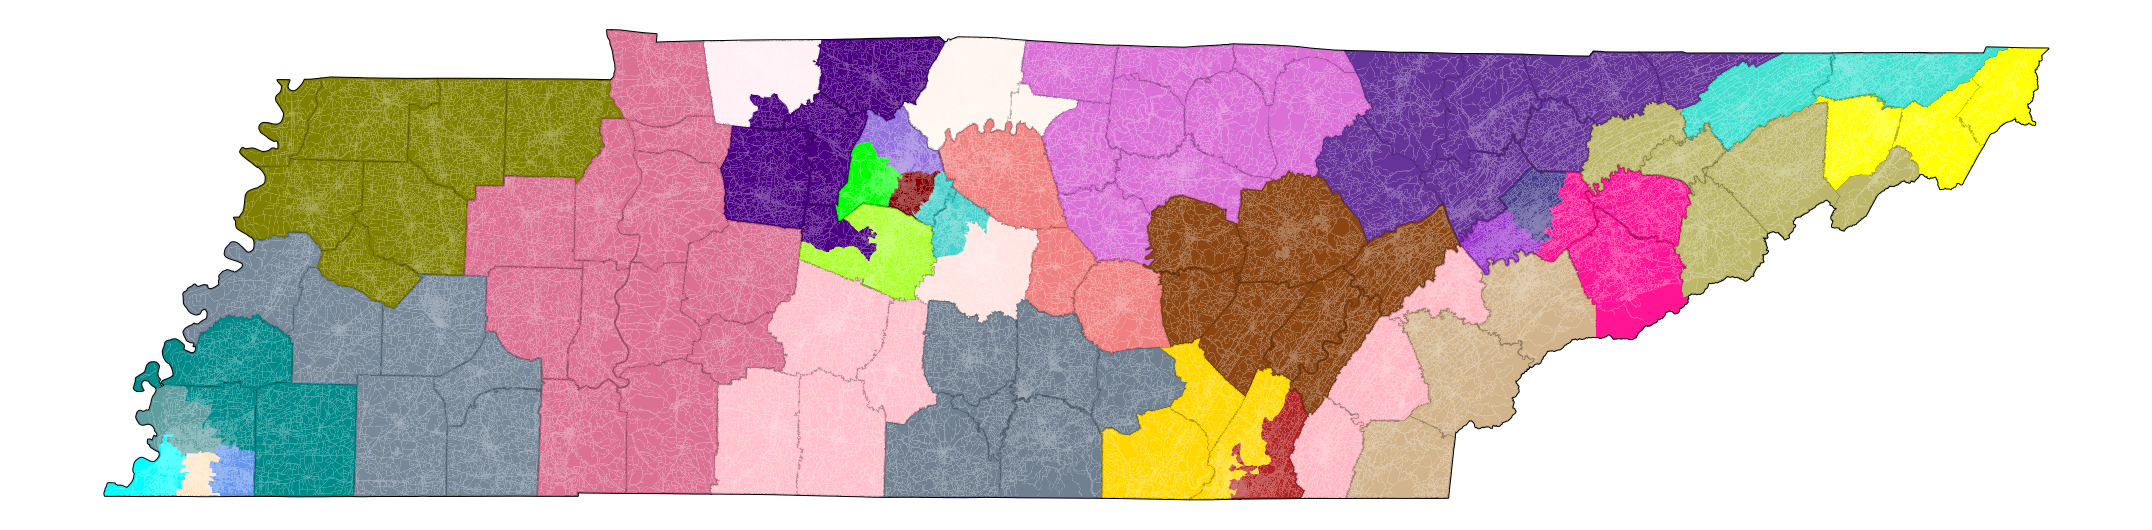

In [7]:
Tractfile = 'TN_county.shp'

# Select the county you want to plot
county_shapefile = gpd.read_file(filepath + Tractfile)

# Plot the map with county boundaries
fig, ax = plt.subplots(figsize=(10,10))
county_shapefile.plot(ax=ax, color='none', edgecolor='black', linewidth=2)
my_fig = df.plot(column='assignment',cmap=custom_cmap, ax=ax).get_figure()
RESIZE_FACTOR = 3
my_fig.set_size_inches(my_fig.get_size_inches()*RESIZE_FACTOR)
plt.axis('off')
plt.tight_layout()